<a href="https://colab.research.google.com/github/VaishnavKaspate/BML-EXP/blob/main/LCA3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'ID': 277, 'type': 'NATIVE', 'title': 'A data-driven approach to predict the s

In [6]:
X.isnull().sum()

,0
age,0
job,288
marital,0
education,1857
default,0
balance,0
housing,0
loan,0
contact,13020
day_of_week,0


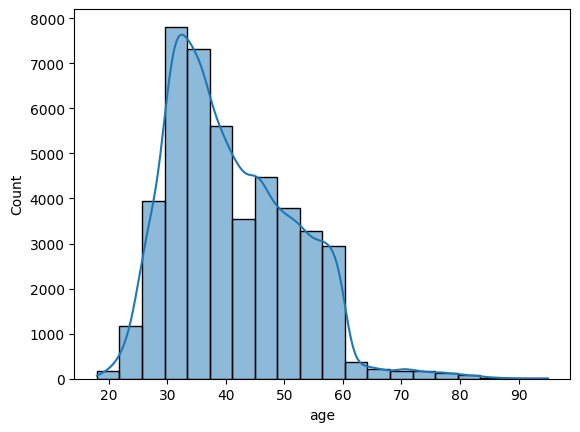

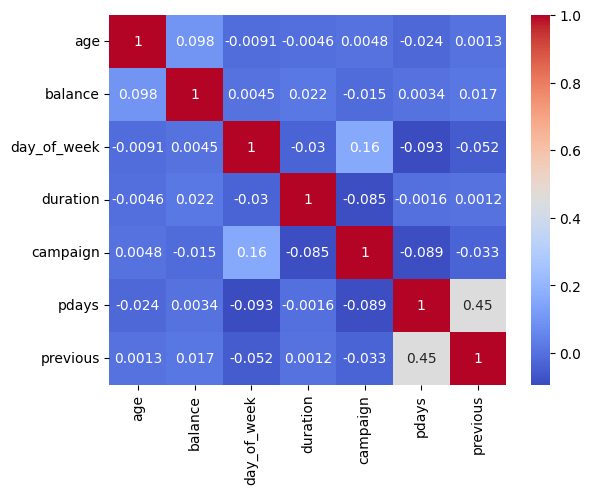

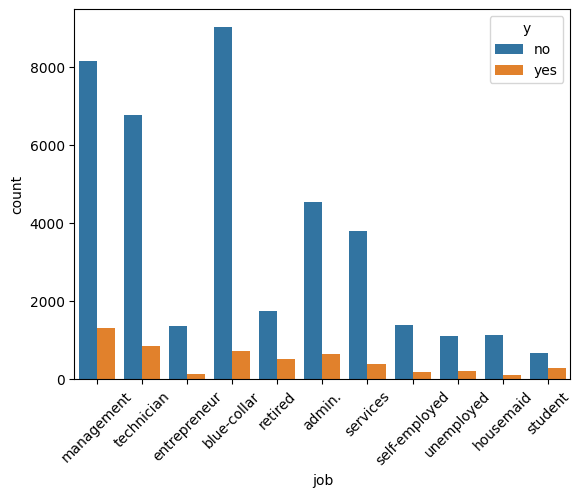

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(X['age'], bins=20, kde=True)
plt.show()

numeric_X = X.select_dtypes(include=['number'])
sns.heatmap(numeric_X.corr(), annot=True, cmap='coolwarm')
plt.show()

sns.countplot(x='job', hue=y.squeeze(), data=X.join(y))
plt.xticks(rotation=45)
plt.show()

In [9]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

num_cols = X.select_dtypes(include=['int64', 'float64']).columns
cat_cols = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

model_lr = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', LogisticRegression(max_iter=1000))])
model_lr.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('classifier', LogisticRegression(max_iter=1000))])

In [11]:
from sklearn.ensemble import RandomForestClassifier

model_rf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', RandomForestClassifier(random_state=42))])
model_rf.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  Index(['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous'],
      dtype='object')),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome'],
      dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

              precision    recall  f1-score   support

          no       0.92      0.97      0.95      7985
         yes       0.65      0.40      0.49      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043

[[7760  225]
 [ 639  419]]
ROC-AUC: 0.926285639543899


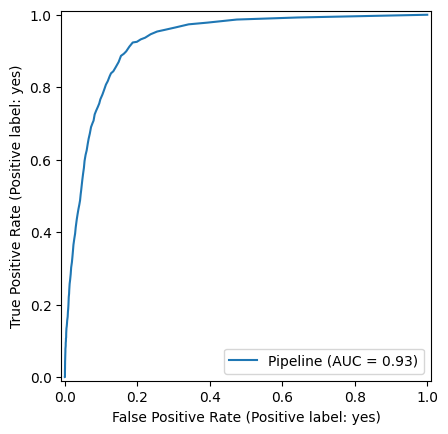

In [13]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

y_pred = model_rf.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# ROC-AUC
y_proba = model_rf.predict_proba(X_test)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test, y_proba))

RocCurveDisplay.from_estimator(model_rf, X_test, y_test)
plt.show()

Train shape: (36168, 6) Test shape: (9043, 6)
Running small hyperparam search (this is optional and short)...
Best LR params: {'clf__C': 0.1}
Best RF params: {'clf__max_depth': 10, 'clf__n_estimators': 200}

Model comparison (6-feature model):
               precision  recall     f1    auc
model                                        
RandomForest      0.303   0.444  0.360  0.712
Logistic          0.249   0.399  0.307  0.676


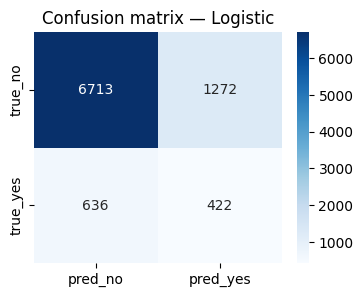

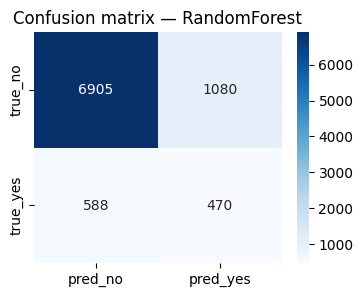

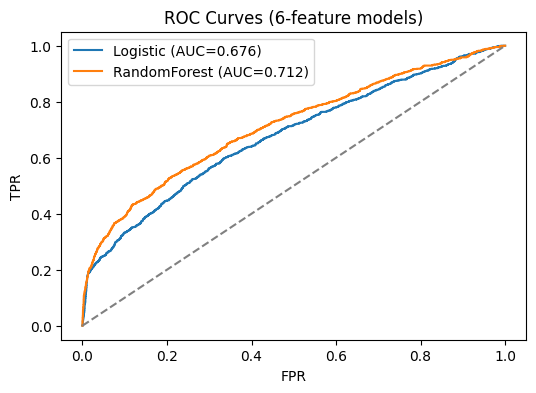


Top features (RandomForest importances):
            feature  importance
3               age    0.227354
8  poutcome_success    0.195763
4           balance    0.194409
1             pdays    0.174889
0          campaign    0.076456
2          previous    0.063682
5  poutcome_failure    0.032181
6  poutcome_missing    0.024542
7    poutcome_other    0.010725


In [18]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support, roc_auc_score, confusion_matrix, roc_curve
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

selected_features = ['poutcome', 'campaign', 'pdays', 'previous', 'age', 'balance']
X_small = X[selected_features].copy()

if hasattr(y, "iloc"):
    y_series = y.iloc[:, 0] if (hasattr(y, "shape") and y.shape[1] == 1) else y.squeeze()
else:
    y_series = y
y_bin = y_series.map({'yes': 1, 'no': 0}) if y_series.dtype == 'O' else y_series

X_train, X_test, y_train, y_test = train_test_split(
    X_small, y_bin, test_size=0.2, random_state=42, stratify=y_bin
)
print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

numeric_features = ['campaign', 'pdays', 'previous', 'age', 'balance']
categorical_features = ['poutcome']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

pipe_lr = Pipeline(steps=[
    ('pre', preprocessor),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42))
])

pipe_rf = Pipeline(steps=[
    ('pre', preprocessor),
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

print("Running small hyperparam search (this is optional and short)...")
gs_lr = GridSearchCV(pipe_lr, {'clf__C': [0.1, 1.0, 10]}, cv=3, scoring='f1', n_jobs=-1, error_score='raise')
gs_lr.fit(X_train, y_train)
print("Best LR params:", gs_lr.best_params_)

gs_rf = GridSearchCV(pipe_rf, {'clf__n_estimators': [100, 200], 'clf__max_depth': [None, 10]}, cv=3, scoring='f1', n_jobs=-1, error_score='raise')
gs_rf.fit(X_train, y_train)
print("Best RF params:", gs_rf.best_params_)

models = {'Logistic': gs_lr.best_estimator_, 'RandomForest': gs_rf.best_estimator_}
results = []
for name, model in models.items():
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    prec, rec, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary', pos_label=1)
    auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)
    results.append({'model': name, 'precision': prec, 'recall': rec, 'f1': f1, 'auc': auc,
                    'tn': cm[0, 0], 'fp': cm[0, 1], 'fn': cm[1, 0], 'tp': cm[1, 1]})

comp_df = pd.DataFrame(results).set_index('model').sort_values('f1', ascending=False)
print("\nModel comparison (6-feature model):\n", comp_df[['precision', 'recall', 'f1', 'auc']].round(3))

for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['pred_no', 'pred_yes'], yticklabels=['true_no', 'true_yes'])
    plt.title(f'Confusion matrix — {name}')
    plt.show()

plt.figure(figsize=(6, 4))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, y_proba):.3f})")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('ROC Curves (6-feature models)')
plt.legend(); plt.show()

print("\nTop features (RandomForest importances):")

rf_pre = models['RandomForest'].named_steps['pre']
ohe = rf_pre.named_transformers_['cat'].named_steps['onehot']
cat_names = list(ohe.get_feature_names_out(categorical_features))
feature_names = numeric_features + cat_names
importances = models['RandomForest'].named_steps['clf'].feature_importances_
fi = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values('importance', ascending=False)
print(fi)
